<h1><center>Car Accident Severity</center></h1>

<h4>About this Notebook</h4>
In this notebook,I have implemented IBM Data Science capstone project on the topic Car Accident Severity, using Machine learning classification models to predict severity of accidents based on addresstype(intersection,alley,block),junctiontype,weather,light and road condition. So based on which my target field is Severity code and features are Addrtype,Junctiontype,Weathercond,Lightcond and Roadcond.

<h3>Approach</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_understanding">Data Undersdtanding</a></li>
        <li><a href="#data_exploration">Exploratory Data Analysis</a></li>
        <li><a href="#predictivemodeling">Predictive Model Development and Evaluation</a></li>
        <li><a href="#knn">K nearest neighbor (KNN</a></li>
        <li><a href="#decisiotree">Decision Tree</a></li>
        <li><a href="#logistic">Logistic Regression</a></li>
    </ol>
</div>
<br>
<hr>


In [2]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
from plotly import __version__
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


<h2 id="data_understanding">Data Understanding</h2>

In [17]:

#downloading dataset - it takes few seconds to run
!wget -nv -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
#read the data    
df = pd.read_csv("Data-Collisions.csv")
df.head(10)

2020-09-19 12:29:31 URL:https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv [73917638/73917638] -> "Data-Collisions.csv" [1]


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [4]:
#shape of the data
df.shape

(194673, 38)

In [5]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [18]:
#dropping irrelevent columns

df = df.drop(['X', 'Y','OBJECTID', 'COLDETKEY','STATUS','REPORTNO', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE','INCKEY',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)
df.head(5)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight


#### Missing values

In [7]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE        0
INCKEY              0
ADDRTYPE         1926
SEVERITYDESC        0
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

In [19]:
#replace missing values with 'Others'
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

In [20]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE     0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

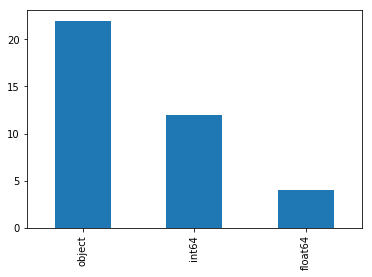

In [5]:
df.dtypes.value_counts().plot(kind='bar')

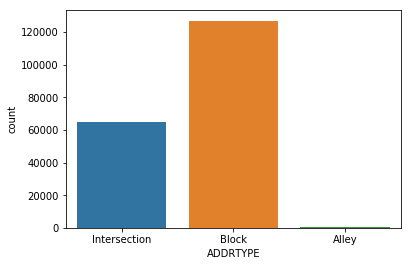

In [6]:
sns.countplot(df['ADDRTYPE'], data=df)

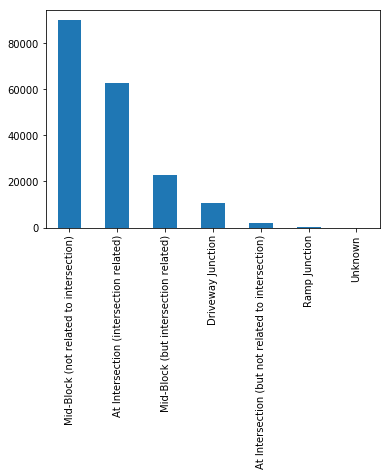

In [31]:
df.JUNCTIONTYPE.value_counts().plot(kind='bar')

### Exploratory Data Analysis

In [10]:
#summarize statistics using pandas dataframe
df.describe()

,SEVERITYCODE,INCKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,141091.456350,2.444427,0.037139,0.028391,1.920780
std,0.457778,86634.402737,1.345929,0.198150,0.167413,0.631047
min,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,70383.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,123363.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,203319.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,331454.000000,81.000000,6.000000,2.000000,12.000000


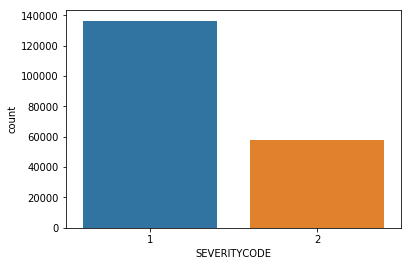

In [11]:
sns.countplot(df['SEVERITYCODE'], data=df)

In [12]:
df.groupby('SEVERITYCODE')['INCKEY'].nunique()

SEVERITYCODE
1    136485
2     58188
Name: INCKEY, dtype: int64

Relationship Analysis

In [110]:
numerical = [
  'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'
]
categorical = [
  'SEVERITYDESC','ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 
]

df = df[numerical + categorical]
df.shape

(194673, 11)

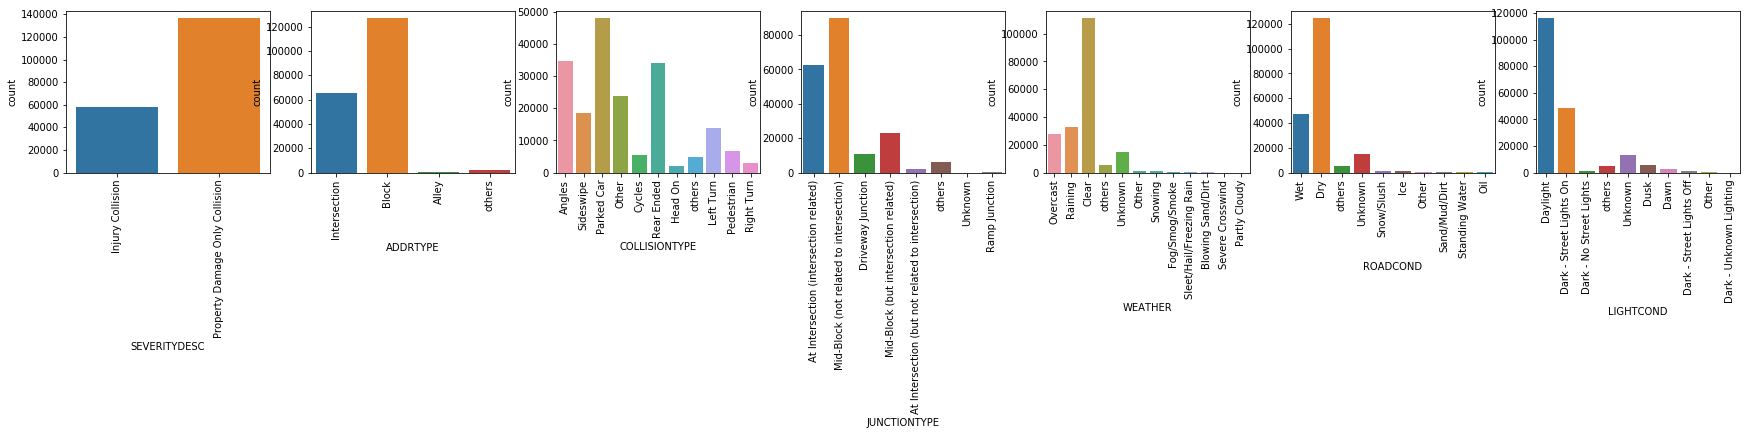

In [111]:
fig, ax = plt.subplots(1, 7, figsize=(30, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    plt.subplots_adjust(bottom=0.3, top=0.75)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Based on below correlation, we can say that there is no much corelation between these attributes

In [21]:
corelation=df.corr()

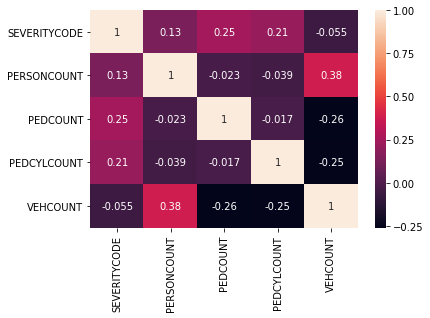

In [22]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

Based on below Pairplots- we can say there might be strong relationship between PERSONCOUNT,PEDCOUNT and 
PERSONSONCOUNT,VEHCOUNT and other relationships make no sense.

Other observation from all pairplots is that we can see some extreme values, which can be removed

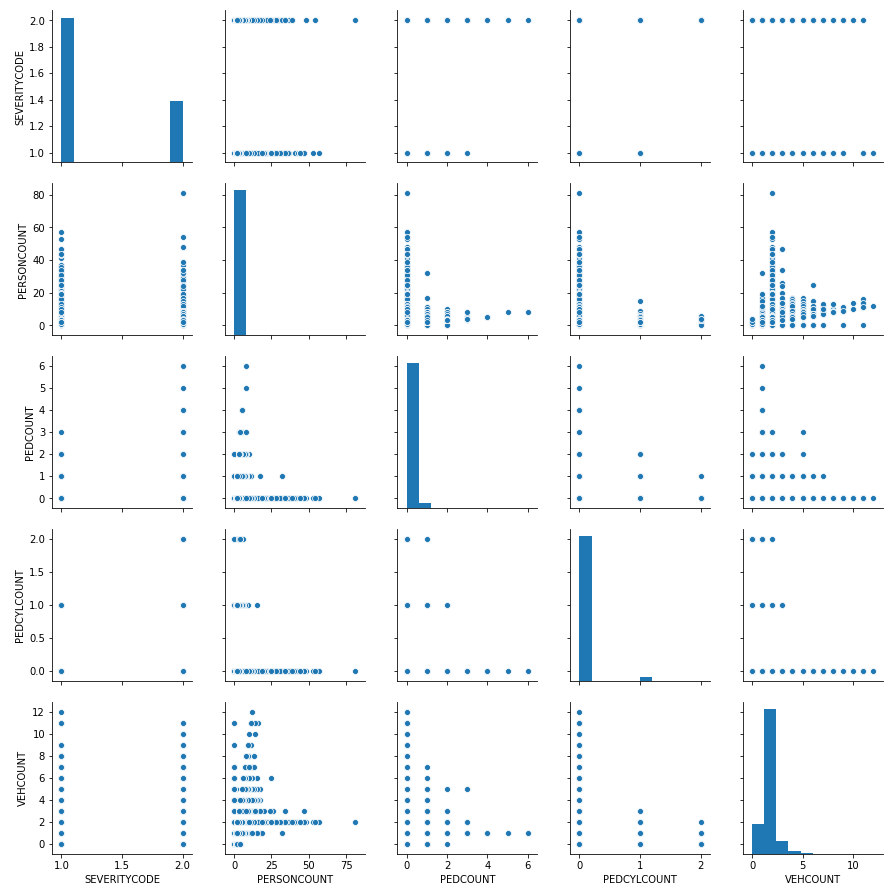

In [23]:
sns.pairplot(df)

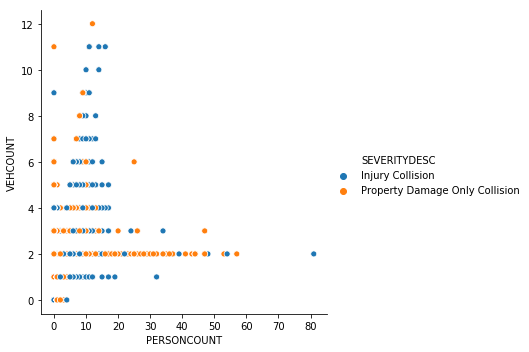

In [26]:
sns.relplot(x='PERSONCOUNT', y='VEHCOUNT',hue='SEVERITYDESC', data=df)

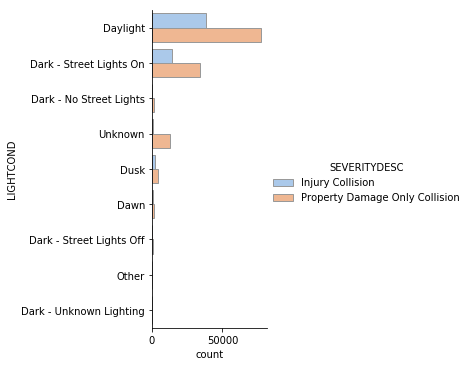

In [5]:
sns.catplot(y="LIGHTCOND", hue="SEVERITYDESC", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

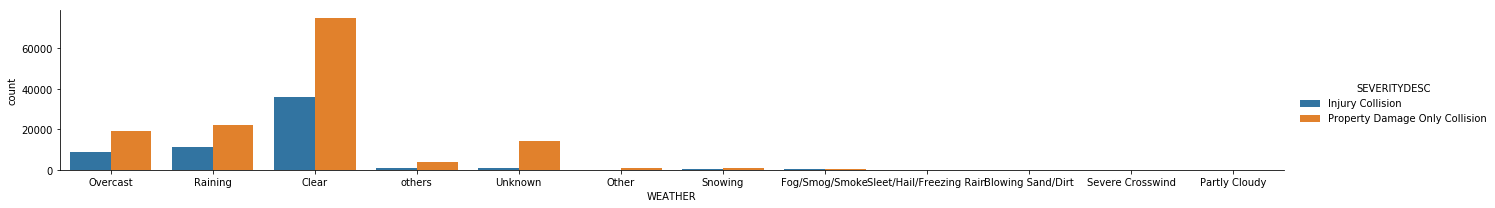

In [38]:
sns.catplot(x="WEATHER",kind="count", hue="SEVERITYDESC", data=df,height=3, 
    aspect=6)

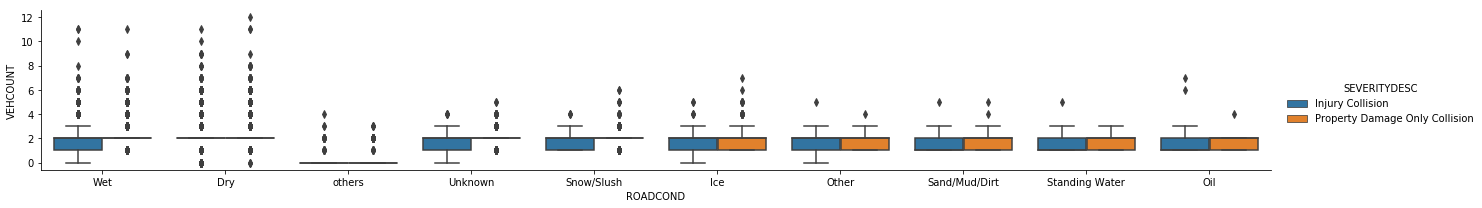

In [40]:
sns.catplot(
    data=df,
    x='ROADCOND',
    y='VEHCOUNT',
    hue='SEVERITYDESC',
    kind='box',
    height=3, 
    aspect=6,
    )

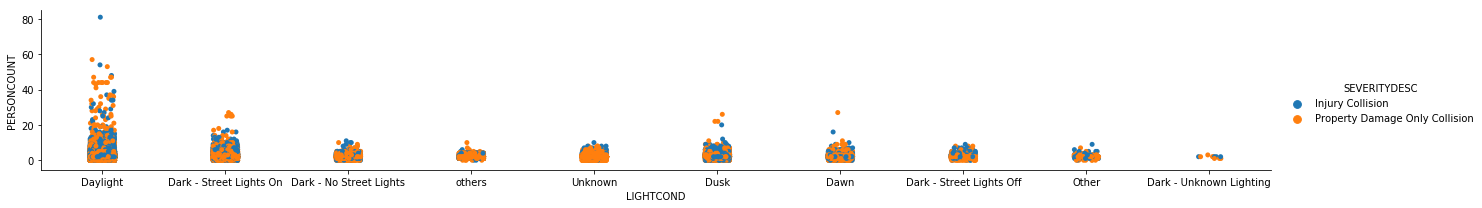

In [41]:
sns.catplot(x="LIGHTCOND",y="PERSONCOUNT",hue="SEVERITYDESC", data=df,height=3, 
    aspect=6)

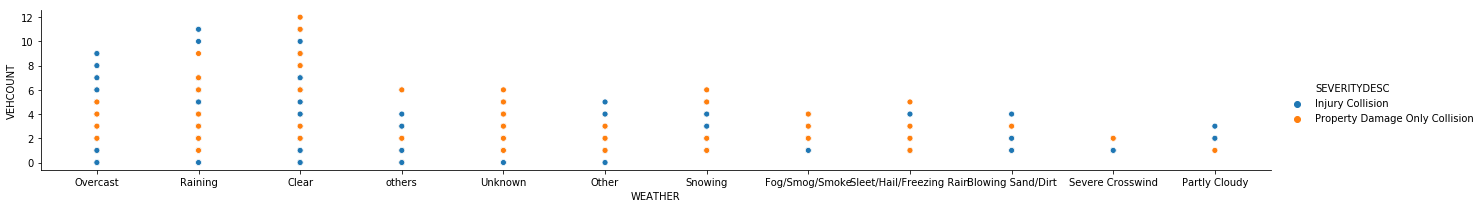

In [32]:
sns.relplot(x="WEATHER", y="VEHCOUNT", hue="SEVERITYDESC", data=df,height=3, aspect=6);

In [57]:
df_test=df.groupby('LIGHTCOND')['INCKEY'].nunique()
df_test

LIGHTCOND
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Street Lights On      48507
Dark - Unknown Lighting         11
Dawn                          2502
Daylight                    116137
Dusk                          5902
Other                          235
Unknown                      13473
others                        5170
Name: INCKEY, dtype: int64

In [42]:
#Grouping data applied on catagorical variables
df_test=df[['LIGHTCOND','SEVERITYDESC','INCKEY']]
df_grp=df_test.groupby(['LIGHTCOND','SEVERITYDESC'],as_index=False).count()
df_grp

,LIGHTCOND,SEVERITYDESC,INCKEY
0,Dark - No Street Lights,Injury Collision,334
1,Dark - No Street Lights,Property Damage Only Collision,1203
2,Dark - Street Lights Off,Injury Collision,316
3,Dark - Street Lights Off,Property Damage Only Collision,883
4,Dark - Street Lights On,Injury Collision,14475
5,Dark - Street Lights On,Property Damage Only Collision,34032
6,Dark - Unknown Lighting,Injury Collision,4
7,Dark - Unknown Lighting,Property Damage Only Collision,7
8,Dawn,Injury Collision,824
9,Dawn,Property Damage Only Collision,1678


In [43]:
#Grouping data applied on catagorical variables
df_test=df[['LIGHTCOND','SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
df_grp=df_test.groupby(['LIGHTCOND','SEVERITYCODE'],as_index=False).sum()
df_grp

,LIGHTCOND,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,Dark - No Street Lights,1,2548,9,5,2306
1,Dark - No Street Lights,2,855,57,28,602
2,Dark - Street Lights Off,1,1943,7,3,1718
3,Dark - Street Lights Off,2,870,44,26,583
4,Dark - Street Lights On,1,80523,225,121,67142
5,Dark - Street Lights On,2,39986,2083,807,26792
6,Dark - Unknown Lighting,1,12,0,0,11
7,Dark - Unknown Lighting,2,8,2,1,5
8,Dawn,1,3619,14,12,3283
9,Dawn,2,1912,126,98,1452


In [19]:
df_pivot=df_grp.pivot(index='LIGHTCOND',columns='SEVERITYCODE')
df_pivot

PERSONCOUNT         PEDCOUNT       PEDCYLCOUNT        \
SEVERITYCODE                       1       2        1     2           1     2   
LIGHTCOND                                                                       
Dark - No Street Lights         2548     855        9    57           5    28   
Dark - Street Lights Off        1943     870        7    44           3    26   
Dark - Street Lights On        80523   39986      225  2083         121   807   
Dark - Unknown Lighting           12       8        0     2           0     1   
Dawn                            3619    1912       14   126          12    98   
Daylight                      185737  105123      425  3852         475  3638   
Dusk                            9568    5349       21   234          25   186   
Other                            359     136        2     4           0     2   
Unknown                        26019    1467       16   100          37    56   
others                          7593    2237        0     9           1     6   

                         VEHCOUNT         
SEVERITYCODE                    1      2  
LIGHTCOND                                 
Dark - No Street Lights      2306    602  
Dark - Street Lights Off     1718    583  
Dark - Street Lights On     67142  26792  
Dark - Unknown Lighting        11      5  
Dawn                         3283   1452  
Daylight                   156372  74331  
Dusk                         7959   3650  
Other                         345    100  
Unknown                     25647   1065  
others                        450    111

### Encoding the data - Conversion of catagorical variables to numerical values

Features in this dataset are categorical WEATHER,ROADCOND,LIGHTCOND, Sklearn KNN,Decision Trees,Logistic models do not handle categorical variables. But still we can convert these features to numerical values.

In [42]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

In [43]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,Injury Collision,Angles,2,0,0,2,1,4,8,5
1,1,1,Property Damage Only Collision,Sideswipe,2,0,0,2,4,6,8,2
2,1,1,Property Damage Only Collision,Parked Car,4,0,0,3,4,4,0,5
3,1,1,Property Damage Only Collision,Other,3,0,0,3,4,1,0,5
4,2,2,Injury Collision,Angles,2,0,0,2,1,6,8,5


In [170]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

## Predictive Model Development & Evaluation

In [172]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

**Train Test Split**

In [177]:
#split the data

X = df[['INCKEY','ADDRTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [178]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(155738, 6)
(155738,)

Test set size
(38935, 6)
(38935,)


### K nearest neighbor (KNN)

**Train model and Predict for K values from 1 to 25** 

In [183]:
#it takes few seconds to run
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model using Training data set
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #Prediction using Test data set
    yhat=neigh.predict(X_test)
    #Finding accuracy of the model comparing actual and predicted values from test dataset
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.59833055, 0.67206883, 0.62542699, 0.67484269, 0.64430461,
       0.67851547, 0.65555413, 0.68231668, 0.66639271, 0.68437139,
       0.67345576, 0.68997046, 0.67913189, 0.69125466, 0.68262489,
       0.69343778, 0.68622062, 0.69487608, 0.68881469, 0.69569796,
       0.69169128, 0.69764993, 0.69410556, 0.69911391])

**Plot model accuracy for Different number of Neighbors**

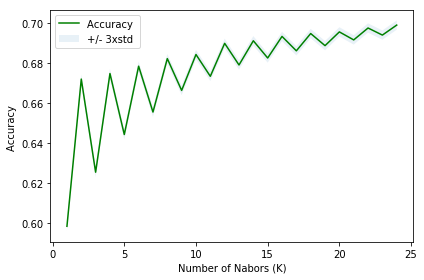

In [184]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [185]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.699113907795043 with k= 24


### Decision Tree

**Model development** 

In [179]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Train model using Training data set**

In [180]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prediction using Test data set**

In [181]:
predTree = dTree.predict(X_test)

In [182]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
94063     1
137563    2
78237     1
105763    1
138711    1
Name: SEVERITYCODE, dtype: int64


**Model Evaluation- Finding accuracy of the model**

In [183]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Evaluating accuracy of the model using actual and predicted values of test dataset
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7026839604468986


## Logistic Regression

**Model development**

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Training model using training data set
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
#Predicting values using test dataset
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [186]:
#predicting probability of 1 or 0 using test data set
yhat_prob = LR.predict_proba(X_test) #predict_probability
yhat_prob

array([[0.62593211, 0.37406789],
       [0.68905437, 0.31094563],
       [0.60596091, 0.39403909],
       ...,
       [0.56748586, 0.43251414],
       [0.68027414, 0.31972586],
       [0.66150667, 0.33849333]])

**Model Evaluation- Finding accuracy of the model**

In [187]:
#Evaluating accuracy of the model using actual and predicted values of test dataset
print('Score:',accuracy_score(yhat, y_test))
print('F1-Score:',f1_score(yhat, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, yhat))
print('')
print('Classification Report:')
print (classification_report(y_test, yhat))

Score: 0.7026839604468986
F1-Score: 0.8253838959785199

Confusion Martix:
[[27359     0]
 [11576     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27359
           2       0.00      0.00      0.00     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**log loss**

In [188]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6351532318326613

| Model         | Accuracy |
| ------------- |:---------|
| KNN           | 0.69     |
| Decision Tree | 0.70     |  
| Logistic      | 0.70     |    

## Conclusion

I have got a decent accuracy value for all classification algorithms. So the best classifier of this problem are Decision Tree, Logistic and KNN based on their accuracy value. 
By revealing hidden patterns in predicting severity of accidents based on the features Addrtype. Junctiontype, Weather, Road and Light conditions have significant impact on whether to travel or not which often result in injury(Severity 1) and property damage(Severity 2) as per the casestudy. 
